# Demo: Vegas Coin Flipping

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = [8, 6]
mpl.rcParams["font.size"] = 14

In [2]:
p = 0.7  # this is a FIXED value, albeit unknown

def experiment(n):
    num_cheaters = int(np.floor(n * p))
    num_honest = n - num_cheaters
    return (num_cheaters * 1) + np.sum(np.random.randint(0, 2, (num_honest,)))

## Estimating $p$ with $\hat{p}$

We found using math that $\hat{p} = 2X - 1$ is an unbiased estimator of $p$. Let's see if that is in fact the case, empirically.

In [3]:
n = 1000
X_sum = experiment(n)
X = X_sum / n
p_hat = 2 * X - 1
p_hat

0.706

## The Distribution of $\hat{p}$

In [4]:
def get_p_hat(n):
    X_sum = experiment(n)
    X_bar = X_sum / n
    p_hat = 2 * X_bar - 1
    return p_hat

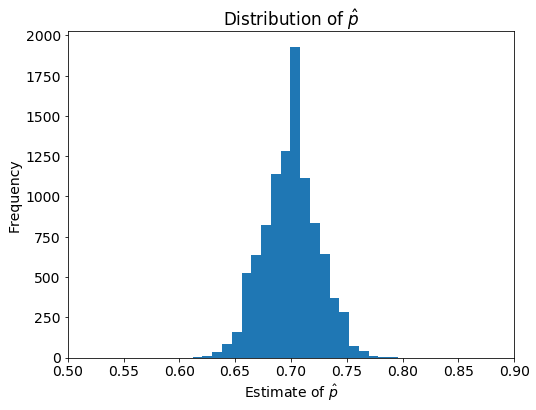

In [5]:
n = 500
estimates = [get_p_hat(n) for _ in range(10000)]
plt.hist(estimates, bins=21)
plt.title(r"Distribution of $\hat{p}$")
plt.xlabel(r"Estimate of $\hat{p}$")
plt.ylabel(r"Frequency")
plt.xlim((p - 0.2, p + 0.2))
plt.show()

### How often is $\hat{p}$ far away from $p$?

The cell below computes the proportion of estimates $\hat{p}$ which at most 0.05 away from the true $\hat{p}$. Notice that the Chebyshev bound is very conservative, and in fact even with $n=1000$ we usually get more than $95\%$ of the estimates away from $p$ by at most $0.05$. In fact most of the time you can get away with $n=500$ instead of $n=8000$.

In [6]:
np.mean(np.abs(np.array(estimates) - p) <= 0.05)

0.9608